<a href="https://colab.research.google.com/github/dyeroshenko/DLI/blob/main/notebooks/transfer_learning_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning

In this notebook, we load a pre-trained model (in this case, VGGNet19) and finetune it for a new task: detecting hot dogs.

#### Load dependencies

In [1]:
from tensorflow.keras.applications.vgg19 import VGG19 # new!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator # new!

#### Load the pre-trained VGG19 model

In [2]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Freeze all the layers in the base VGGNet19 model

In [3]:
for layer in vgg19.layers:
    layer.trainable = False

#### Add custom classification layers

In [4]:
# Instantiate the sequential model and add the VGG19 model:
model = Sequential()
model.add(vgg19)

# Add the custom layers atop the VGG19 model:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#### Compile the model for training

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,174,921 (76.96 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 100,359 (392.03 KB)

In [6]:
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Prepare the data for training

In [ ]:
# Download dataset

! pip install gdown
! gdown --id 1cMHg2tSs2xCoyhYpWbeityGfmKALKGoX
! unzip -qq archive.zip

In [24]:
# Instantiate two image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [38]:
# Define the batch size:
batch_size=32

In [56]:
# Define the train and validation generators:
train_generator = train_datagen.flow_from_directory(
    directory='/content/hotdog-nothotdog/hotdog-nothotdog/train',
    target_size=(224, 224),
    classes=['hotdog','nothotdog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='/content/hotdog-nothotdog/hotdog-nothotdog/test',
    target_size=(224, 224),
    classes=['hotdog','nothotdog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 4242 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [60]:
model.fit(train_generator, steps_per_epoch=15,
                    epochs=16, validation_data=valid_generator,
                    validation_steps=15)

Epoch 1/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8393 - loss: 0.4039

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 596ms/step - accuracy: 0.8370 - loss: 0.4067 - val_accuracy: 0.7875 - val_loss: 0.4820
Epoch 2/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 626ms/step - accuracy: 0.7816 - loss: 0.5398 - val_accuracy: 0.7900 - val_loss: 0.4819
Epoch 3/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 514ms/step - accuracy: 0.7912 - loss: 0.5448 - val_accuracy: 0.7675 - val_loss: 0.5296
Epoch 4/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 561ms/step - accuracy: 0.8085 - loss: 0.4513 - val_accuracy: 0.7600 - val_loss: 0.5717
Epoch 5/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 0.8008 - loss: 0.3956 - val_accuracy: 0.7200 - val_loss: 0.6364
Epoch 6/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 506ms/step - accuracy: 0.8346 - loss: 0.3981 - val_accuracy: 0.7525 - val_loss: 0.5352
Epoch 7/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 618ms/step - accuracy: 0.8059 - loss: 0.5958 - val_accuracy: 0.7600 - val_loss: 0.5631
Epoch 8/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 498ms/step - accuracy: 0.8217 - loss: 0.4250 - val_accuracy: 0.7400 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


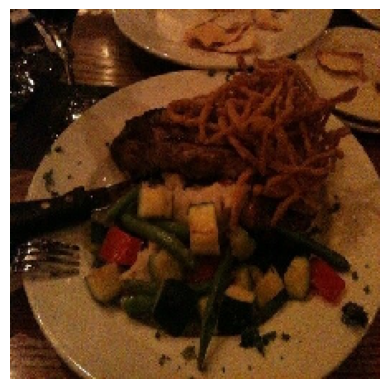

Predicted class: hotdog
Confidence scores: hotdog (72.04%) / nothotdog (27.96%)


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Choose a random image from the validation set
idx = np.random.randint(0, len(valid_generator.filenames))
img_path = '/content/hotdog-nothotdog/hotdog-nothotdog/test/' + valid_generator.filenames[idx]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# Rescale the image
x = x / 255.0

# Make the prediction
prediction = model.predict(x)

# Display the image and prediction
plt.imshow(img)
plt.axis('off')
plt.show()

predicted_class = np.argmax(prediction)
class_labels = ['hotdog', 'nothotdog']
print(f"Predicted class: {class_labels[predicted_class]}")
print(f"Confidence scores: hotdog ({round(prediction[0][0] * 100, 2)}%) / nothotdog ({round(prediction[0][1] * 100, 2)}%)")